In [1]:
using JLD2
using FileIO
using PyPlot
using Statistics
using StatsBase 
using Distributions
using LinearAlgebra
using HDF5
using IntervalSets
using Random, ArraysOfArrays
using ValueShapes
using Measurements
using BAT
using ForwardDiff
using BenchmarkTools

In [2]:
SMALL_SIZE = 10
MEDIUM_SIZE = 10
BIGGER_SIZE = 10

# plt.rc("font", family="serif",) #serif="Times"
# plt.rc("font", family= "Times New Roman")
plt.rc("font", family="serif", serif="Computer Modern")
plt.rc("font", size=SMALL_SIZE)          # controls default text sizes
plt.rc("axes", titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)    # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc("text", usetex=true)

In [3]:
function cov_matr(smpl_tmp)
    smp_fl, w = flatview(unshaped.(smpl_tmp.v)), smpl_tmp.weight
    smp_fl = smp_fl ./ std(smp_fl, FrequencyWeights(w), 2)
    smp_fl = smp_fl .- mean(smp_fl, FrequencyWeights(w), dims=2)
    cov_m = cov(smp_fl, FrequencyWeights(w), 2)
    return cov_m
end

function predict_position(x0, y0, θ, α; s = Float64[1.478, 15.026, 23.1150])
    x_expected = x0 .+ cos(α).*θ.*s.*10^6
    y_expected = y0 .+ sin(α).*θ.*s.*10^6
    return (x_expected, y_expected)
end

prior_ang = NamedTupleDist(
    θ = [10^-15 .. 10^-4 for i in 1:600],
    α = [0 .. 2*pi  for i in 1:600],
    x_alignm = [-200 .. 200 for i in 1:3],
    y_alignm = [-200 .. 200 for i in 1:3],
    σ = [6.23, 32.9, 35.1],
);

In [4]:
@load "../../data/sampling_results/Benchmark-9/mcmc-summary-data-600.jld" data_save

1-element Vector{Symbol}:
 :data_save

In [5]:
summary_data = data_save[1];

In [6]:
runind_n = summary_data.ev_index ./ maximum(summary_data.ev_index)

fig, ax= plt.subplots(2,2, figsize=(6,6), sharex=true, sharey=true)
fig.subplots_adjust(hspace=0.07, wspace=0.07)

label = "Mean + Std"

x_tmp = [i[1] for i in summary_data.μx_align]
y_tmp = [i[1] for i in summary_data.μy_align]
x_std = [i[1] for i in summary_data.σx_align]
y_std = [i[1] for i in summary_data.σy_align]

for i in 1:length(x_tmp)
    ax[1].errorbar(x_tmp[i], y_tmp[i], xerr = x_std[i], yerr=y_std[i], 
        label=label, 
        mfc=plt.cm.OrRd(runind_n[i]),
        fmt="o", 
        markersize = 4, 
        markeredgecolor = "k", 
        markeredgewidth=0.4, 
        capsize=1.5, 
        ecolor="k", elinewidth=0.4,
    )
    label=""
end


x_tmp = [i[2] for i in summary_data.μx_align]
y_tmp = [i[2] for i in summary_data.μy_align]
x_std = [i[2] for i in summary_data.σx_align]
y_std = [i[2] for i in summary_data.σy_align]

for i in 1:length(x_tmp)
    ax[3].errorbar(x_tmp[i], y_tmp[i], xerr = x_std[i], yerr=y_std[i], 
        label=label, 
        mfc=plt.cm.OrRd(runind_n[i]),
        fmt="o", 
        markersize = 4, 
        markeredgecolor = "k", 
        markeredgewidth=0.4, 
        capsize=1.5, 
        ecolor="k", elinewidth=0.4,
    )
end

x_tmp = [i[3] for i in summary_data.μx_align]
y_tmp = [i[3] for i in summary_data.μy_align]
x_std = [i[3] for i in summary_data.σx_align]
y_std = [i[3] for i in summary_data.σy_align]

for i in 1:length(x_tmp)
    ax[2].errorbar(x_tmp[i], y_tmp[i], xerr = x_std[i], yerr=y_std[i], 
        label=label, 
        mfc=plt.cm.OrRd(runind_n[i]),
        fmt="o", 
        markersize = 4, 
        markeredgecolor = "k", 
        markeredgewidth=0.4, 
        capsize=1.5, 
        ecolor="k", elinewidth=0.4,
    )
end

x_tmp = [i[4] for i in summary_data.μx_align]
y_tmp = [i[4] for i in summary_data.μy_align]
x_std = [i[4] for i in summary_data.σx_align]
y_std = [i[4] for i in summary_data.σy_align]

for i in 1:length(x_tmp)
    ax[4].errorbar(x_tmp[i], y_tmp[i], xerr = x_std[i], yerr=y_std[i], 
        label=label, 
        mfc=plt.cm.OrRd(runind_n[i]),
        fmt="o", 
        markersize = 4, 
        markeredgecolor = "k", 
        markeredgewidth=0.4, 
        capsize=1.5, 
        ecolor="k", elinewidth=0.4,
    )
end

rect = matplotlib.patches.Rectangle([0,0,], 27.1,30.5, alpha=0.5, linewidth=1,edgecolor="lightblue",facecolor="lightblue", label="Pixel Size")
ax[1].add_patch(rect)

rect = matplotlib.patches.Rectangle([0,0,],  21.6, 23.4, alpha=0.5, linewidth=1,edgecolor="lightblue",facecolor="lightblue")
ax[3].add_patch(rect)

rect = matplotlib.patches.Rectangle([0,0,],  114.0, 125.0, alpha=0.5, linewidth=1,edgecolor="lightblue",facecolor="lightblue")
ax[2].add_patch(rect)

rect = matplotlib.patches.Rectangle([0,0,],  121.8, 120.0, alpha=0.5, linewidth=1,edgecolor="lightblue",facecolor="lightblue")
ax[4].add_patch(rect)

ax[1].legend(loc="upper right", framealpha=0.0)

cb = ax[3].scatter(summary_data.ev_charge, summary_data.ev_charge, s=0.0, c=summary_data.ev_index, cmap="OrRd")
ax_ins_3 = fig.add_axes([0.79,0.77,0.01,0.1])
fig.colorbar(cb, spacing="proportional", label="Event #", cax=ax_ins_3)

ax[1,1].xaxis.tick_top()
ax[1,1].xaxis.set_ticks_position("top")

ax[1,2].xaxis.tick_top()
ax[1,2].xaxis.set_ticks_position("top")
ax[1,2].yaxis.tick_right()
ax[1,2].yaxis.set_ticks_position("right")

ax[2,2].yaxis.tick_right()
ax[2,2].yaxis.set_ticks_position("right")

ax[1,1].text(0.04,0.91,"Cam. 1", transform=ax[1,1].transAxes)
ax[1,2].text(0.04,0.91,"Cam. 2", transform=ax[1,2].transAxes)
ax[2,1].text(0.04,0.91,"Cam. 3", transform=ax[2,1].transAxes)
ax[2,2].text(0.04,0.91,"Cam. 4", transform=ax[2,2].transAxes)

ax[1,1].set_xlim(-1,350)
ax[1,1].set_ylim(-1,250)

ax[2,2].set_xlabel(L"\mu_x \; \mathrm{(\mu m)}")
ax[2,1].set_xlabel(L"\mu_x \; \mathrm{(\mu m)}")

ax[1,1].set_ylabel(L"\mu_y \; \mathrm{(\mu m)}")
ax[2,1].set_ylabel(L"\mu_y \; \mathrm{(\mu m)}")

Figure(PyObject <Figure size 600x600 with 5 Axes>)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


PyObject Text(38.966658673907304, 0.5, '$\\mu_y \\; \\mathrm{(\\mu m)}$')

# Sampling: 

In [7]:
sampling_ind = 1:600 
n_events = length(sampling_ind)

prior_ang = NamedTupleDist(
    θ = [10^-15 .. 10^-4 for i in 1:n_events],
    α = [0 .. 2*pi  for i in 1:n_events],
    x_alignm = [-200 .. 200 for i in 1:3],
    y_alignm = [-200 .. 200 for i in 1:3],
    σ = [6.23, 32.9, 35.1],
);

In [8]:
smpl_tmp = bat_read("../../data/sampling_results/Benchmark-9/samples-1-600.hdf5").result
samples_1 = varshape(prior_ang).(smpl_tmp);

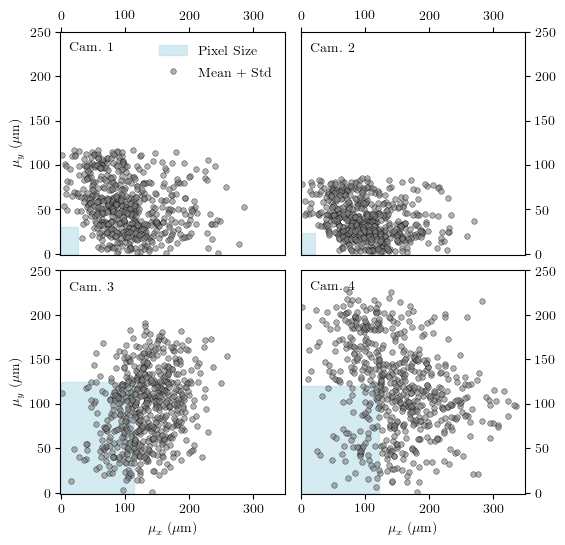

PyObject Text(24.336632052546015, 0.5, '$\\mu_y \\; \\mathrm{(\\mu m)}$')

In [9]:
fig, ax= plt.subplots(2,2, figsize=(6,6), sharex=true, sharey=true)
fig.subplots_adjust(hspace=0.07, wspace=0.07)

x_tmp = [i[2] for i in summary_data.μx_align]
y_tmp = [i[2] for i in summary_data.μy_align]
x_std = [i[2] for i in summary_data.σx_align]
y_std = [i[2] for i in summary_data.σy_align]

for i in 1:length(x_tmp)
    ax[3].errorbar(x_tmp[i], y_tmp[i],
        label=label, 
        mfc="gray",
        fmt="o", 
        markersize = 4, 
        alpha=0.6, 
        markeredgecolor = "k", 
        markeredgewidth=0.4, 
        capsize=1.5, 
        ecolor="k", elinewidth=0.4,
    )
end

x_tmp = [i[3] for i in summary_data.μx_align]
y_tmp = [i[3] for i in summary_data.μy_align]
x_std = [i[3] for i in summary_data.σx_align]
y_std = [i[3] for i in summary_data.σy_align]

for i in 1:length(x_tmp)
    ax[2].errorbar(x_tmp[i], y_tmp[i],
        label=label, 
        mfc="gray",
        fmt="o", 
        markersize = 4, 
        alpha=0.6, 
        markeredgecolor = "k", 
        markeredgewidth=0.4, 
        capsize=1.5, 
        ecolor="k", elinewidth=0.4,
    )
end

x_tmp = [i[4] for i in summary_data.μx_align]
y_tmp = [i[4] for i in summary_data.μy_align]
x_std = [i[4] for i in summary_data.σx_align]
y_std = [i[4] for i in summary_data.σy_align]

for i in 1:length(x_tmp)
    ax[4].errorbar(x_tmp[i], y_tmp[i],
        label=label, 
        mfc="gray",
        fmt="o", 
        alpha=0.6, 
        markersize = 4, 
        markeredgecolor = "k", 
        markeredgewidth=0.4, 
        capsize=1.5, 
        ecolor="k", elinewidth=0.4,
    )
end

label = "Mean + Std"

x_tmp = [i[1] for i in summary_data.μx_align]
y_tmp = [i[1] for i in summary_data.μy_align]
x_std = [i[1] for i in summary_data.σx_align]
y_std = [i[1] for i in summary_data.σy_align]

for i in 1:length(x_tmp)
    ax[1].errorbar(x_tmp[i], y_tmp[i],
        label=label, 
        mfc="gray",
        fmt="o", 
        markersize = 4, 
        alpha=0.6, 
        markeredgecolor = "k", 
        markeredgewidth=0.4, 
        capsize=1.5, 
        ecolor="k", elinewidth=0.4,
    )
    label=""
end

rect = matplotlib.patches.Rectangle([0,0,], 27.1,30.5, alpha=0.5, linewidth=1,edgecolor="lightblue",facecolor="lightblue", label="Pixel Size")
ax[1].add_patch(rect)

rect = matplotlib.patches.Rectangle([0,0,],  21.6, 23.4, alpha=0.5, linewidth=1,edgecolor="lightblue",facecolor="lightblue")
ax[3].add_patch(rect)

rect = matplotlib.patches.Rectangle([0,0,],  114.0, 125.0, alpha=0.5, linewidth=1,edgecolor="lightblue",facecolor="lightblue")
ax[2].add_patch(rect)

rect = matplotlib.patches.Rectangle([0,0,],  121.8, 120.0, alpha=0.5, linewidth=1,edgecolor="lightblue",facecolor="lightblue")
ax[4].add_patch(rect)

ax[1].legend(loc="upper right", framealpha=0.0)

ax[1,1].xaxis.tick_top()
ax[1,1].xaxis.set_ticks_position("top")

ax[1,2].xaxis.tick_top()
ax[1,2].xaxis.set_ticks_position("top")
ax[1,2].yaxis.tick_right()
ax[1,2].yaxis.set_ticks_position("right")

ax[2,2].yaxis.tick_right()
ax[2,2].yaxis.set_ticks_position("right")

ax[1,1].text(0.04,0.91,"Cam. 1", transform=ax[1,1].transAxes)
ax[1,2].text(0.04,0.91,"Cam. 2", transform=ax[1,2].transAxes)
ax[2,1].text(0.04,0.91,"Cam. 3", transform=ax[2,1].transAxes)
ax[2,2].text(0.04,0.91,"Cam. 4", transform=ax[2,2].transAxes)

ax[1,1].set_xlim(-1,350)
ax[1,1].set_ylim(-1,250)

ax[2,2].set_xlabel(L"\mu_x \; \mathrm{(\mu m)}")
ax[2,1].set_xlabel(L"\mu_x \; \mathrm{(\mu m)}")

ax[1,1].set_ylabel(L"\mu_y \; \mathrm{(\mu m)}")
ax[2,1].set_ylabel(L"\mu_y \; \mathrm{(\mu m)}")

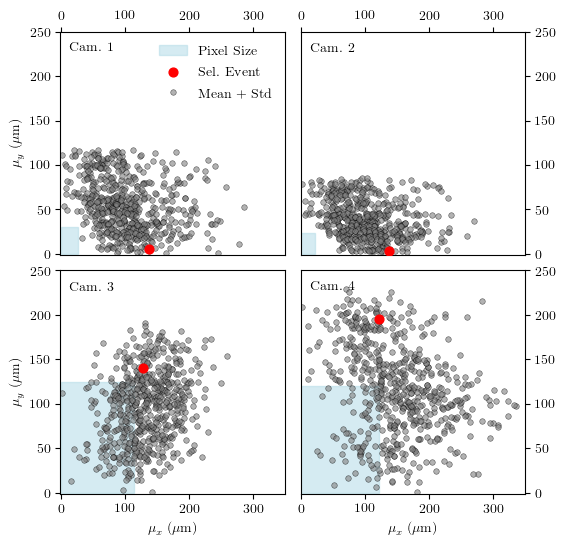

PyObject Text(24.336632052546015, 0.5, '$\\mu_y \\; \\mathrm{(\\mu m)}$')

In [10]:
par_ind = 529 #523
event_ind = sampling_ind[par_ind]

fig, ax= plt.subplots(2,2, figsize=(6,6), sharex=true, sharey=true)
fig.subplots_adjust(hspace=0.07, wspace=0.07)

x_tmp = [i[2] for i in summary_data.μx_align]
y_tmp = [i[2] for i in summary_data.μy_align]
x_std = [i[2] for i in summary_data.σx_align]
y_std = [i[2] for i in summary_data.σy_align]

for i in 1:length(x_tmp)
    ax[3].errorbar(x_tmp[i], y_tmp[i],
        label=label, 
        mfc="gray",
        fmt="o", 
        markersize = 4, 
        alpha=0.6, 
        markeredgecolor = "k", 
        markeredgewidth=0.4, 
        capsize=1.5, 
        ecolor="k", elinewidth=0.4,
    )
end
ax[3].scatter(x_tmp[event_ind], y_tmp[event_ind], color="red", s=40, zorder=4)

x_tmp = [i[3] for i in summary_data.μx_align]
y_tmp = [i[3] for i in summary_data.μy_align]
x_std = [i[3] for i in summary_data.σx_align]
y_std = [i[3] for i in summary_data.σy_align]

for i in 1:length(x_tmp)
    ax[2].errorbar(x_tmp[i], y_tmp[i],
        label=label, 
        mfc="gray",
        fmt="o", 
        markersize = 4, 
        alpha=0.6, 
        markeredgecolor = "k", 
        markeredgewidth=0.4, 
        capsize=1.5, 
        ecolor="k", elinewidth=0.4,
    )
end
ax[2].scatter(x_tmp[event_ind], y_tmp[event_ind], color="red", s=40, zorder=4)

x_tmp = [i[4] for i in summary_data.μx_align]
y_tmp = [i[4] for i in summary_data.μy_align]
x_std = [i[4] for i in summary_data.σx_align]
y_std = [i[4] for i in summary_data.σy_align]

for i in 1:length(x_tmp)
    ax[4].errorbar(x_tmp[i], y_tmp[i],
        label=label, 
        mfc="gray",
        fmt="o", 
        alpha=0.6, 
        markersize = 4, 
        markeredgecolor = "k", 
        markeredgewidth=0.4, 
        capsize=1.5, 
        ecolor="k", elinewidth=0.4,
    )
end
ax[4].scatter(x_tmp[event_ind], y_tmp[event_ind], color="red", s=40, zorder=4)

label = "Mean + Std"

x_tmp = [i[1] for i in summary_data.μx_align]
y_tmp = [i[1] for i in summary_data.μy_align]
x_std = [i[1] for i in summary_data.σx_align]
y_std = [i[1] for i in summary_data.σy_align]

for i in 1:length(x_tmp)
    ax[1].errorbar(x_tmp[i], y_tmp[i],
        label=label, 
        mfc="gray",
        fmt="o", 
        markersize = 4, 
        alpha=0.6, 
        markeredgecolor = "k", 
        markeredgewidth=0.4, 
        capsize=1.5, 
        ecolor="k", elinewidth=0.4,
    )
    label=""
end
ax[1].scatter(x_tmp[event_ind], y_tmp[event_ind], color="red", s=40, zorder=4, label="Sel. Event")

rect = matplotlib.patches.Rectangle([0,0,], 27.1,30.5, alpha=0.5, linewidth=1,edgecolor="lightblue",facecolor="lightblue", label="Pixel Size")
ax[1].add_patch(rect)

rect = matplotlib.patches.Rectangle([0,0,],  21.6, 23.4, alpha=0.5, linewidth=1,edgecolor="lightblue",facecolor="lightblue")
ax[3].add_patch(rect)

rect = matplotlib.patches.Rectangle([0,0,],  114.0, 125.0, alpha=0.5, linewidth=1,edgecolor="lightblue",facecolor="lightblue")
ax[2].add_patch(rect)

rect = matplotlib.patches.Rectangle([0,0,],  121.8, 120.0, alpha=0.5, linewidth=1,edgecolor="lightblue",facecolor="lightblue")
ax[4].add_patch(rect)

ax[1].legend(loc="upper right", framealpha=0.0)

ax[1,1].xaxis.tick_top()
ax[1,1].xaxis.set_ticks_position("top")

ax[1,2].xaxis.tick_top()
ax[1,2].xaxis.set_ticks_position("top")
ax[1,2].yaxis.tick_right()
ax[1,2].yaxis.set_ticks_position("right")

ax[2,2].yaxis.tick_right()
ax[2,2].yaxis.set_ticks_position("right")

ax[1,1].text(0.04,0.91,"Cam. 1", transform=ax[1,1].transAxes)
ax[1,2].text(0.04,0.91,"Cam. 2", transform=ax[1,2].transAxes)
ax[2,1].text(0.04,0.91,"Cam. 3", transform=ax[2,1].transAxes)
ax[2,2].text(0.04,0.91,"Cam. 4", transform=ax[2,2].transAxes)

ax[1,1].set_xlim(-1,350)
ax[1,1].set_ylim(-1,250)

ax[2,2].set_xlabel(L"\mu_x \; \mathrm{(\mu m)}")
ax[2,1].set_xlabel(L"\mu_x \; \mathrm{(\mu m)}")

ax[1,1].set_ylabel(L"\mu_y \; \mathrm{(\mu m)}")
ax[2,1].set_ylabel(L"\mu_y \; \mathrm{(\mu m)}")

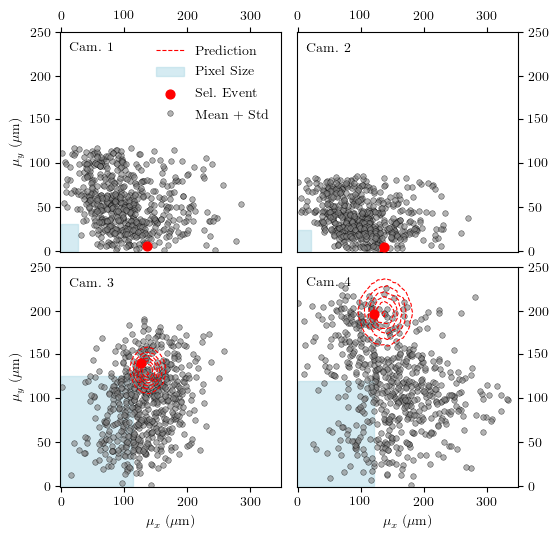

In [11]:
figsize = (5.905631659056317, 5.905631659056317)
# figsize = (6,6)

fig, ax= plt.subplots(2,2, figsize=figsize, sharex=true, sharey=true)
fig.subplots_adjust(hspace=0.07, wspace=0.07)

x_tmp = [i[2] for i in summary_data.μx_align]
y_tmp = [i[2] for i in summary_data.μy_align]
x_std = [i[2] for i in summary_data.σx_align]
y_std = [i[2] for i in summary_data.σy_align]

for i in 1:length(x_tmp)
    ax[3].errorbar(x_tmp[i], y_tmp[i],
        label=label, 
        mfc="gray",
        fmt="o", 
        markersize = 4, 
        alpha=0.6, 
        markeredgecolor = "k", 
        markeredgewidth=0.4, 
        capsize=1.5, 
        ecolor="k", elinewidth=0.4,
    )
end
ax[3].scatter(x_tmp[event_ind], y_tmp[event_ind], color="red", s=40, zorder=4)

x_tmp = [i[3] for i in summary_data.μx_align]
y_tmp = [i[3] for i in summary_data.μy_align]
x_std = [i[3] for i in summary_data.σx_align]
y_std = [i[3] for i in summary_data.σy_align]

for i in 1:length(x_tmp)
    ax[2].errorbar(x_tmp[i], y_tmp[i],
        label=label, 
        mfc="gray",
        fmt="o", 
        markersize = 4, 
        alpha=0.6, 
        markeredgecolor = "k", 
        markeredgewidth=0.4, 
        capsize=1.5, 
        ecolor="k", elinewidth=0.4,
    )
end
ax[2].scatter(x_tmp[event_ind], y_tmp[event_ind], color="red", s=40, zorder=4)

x_tmp = [i[4] for i in summary_data.μx_align]
y_tmp = [i[4] for i in summary_data.μy_align]
x_std = [i[4] for i in summary_data.σx_align]
y_std = [i[4] for i in summary_data.σy_align]

for i in 1:length(x_tmp)
    ax[4].errorbar(x_tmp[i], y_tmp[i],
        label=label, 
        mfc="gray",
        fmt="o", 
        alpha=0.6, 
        markersize = 4, 
        markeredgecolor = "k", 
        markeredgewidth=0.4, 
        capsize=1.5, 
        ecolor="k", elinewidth=0.4,
    )
end
ax[4].scatter(x_tmp[event_ind], y_tmp[event_ind], color="red", s=40, zorder=4)

label = "Mean + Std"

x_tmp = [i[1] for i in summary_data.μx_align]
y_tmp = [i[1] for i in summary_data.μy_align]
x_std = [i[1] for i in summary_data.σx_align]
y_std = [i[1] for i in summary_data.σy_align]

for i in 1:length(x_tmp)
    ax[1].errorbar(x_tmp[i], y_tmp[i],
        label=label, 
        mfc="gray",
        fmt="o", 
        markersize = 4, 
        alpha=0.6, 
        markeredgecolor = "k", 
        markeredgewidth=0.4, 
        capsize=1.5, 
        ecolor="k", elinewidth=0.4,
    )
    label=""
end
ax[1].plot([-10, -10, ], [-10, -10], color="red", linestyle="--", linewidth=0.8, alpha=1, label="Prediction")
ax[1].scatter(x_tmp[event_ind], y_tmp[event_ind], color="red", s=40, zorder=4, label="Sel. Event")

rect = matplotlib.patches.Rectangle([0,0,], 27.1,30.5, alpha=0.5, linewidth=1,edgecolor="lightblue",facecolor="lightblue", label="Pixel Size")
ax[1].add_patch(rect)

rect = matplotlib.patches.Rectangle([0,0,],  21.6, 23.4, alpha=0.5, linewidth=1,edgecolor="lightblue",facecolor="lightblue")
ax[3].add_patch(rect)

rect = matplotlib.patches.Rectangle([0,0,],  114.0, 125.0, alpha=0.5, linewidth=1,edgecolor="lightblue",facecolor="lightblue")
ax[2].add_patch(rect)

rect = matplotlib.patches.Rectangle([0,0,],  121.8, 120.0, alpha=0.5, linewidth=1,edgecolor="lightblue",facecolor="lightblue")
ax[4].add_patch(rect)

ax[1].legend(loc="upper right", framealpha=0.0)


# Plot Contours: 

v1 = Float64[]
v2 = Float64[]
v3 = Float64[]
v4 = Float64[]
v5 = Float64[]
v6 = Float64[]
 
for i in samples_1.v
    pred_x, pred_y = predict_position(x_tmp[event_ind], y_tmp[event_ind], i.θ[par_ind], i.α[par_ind])
    pred_x += i.x_alignm
    pred_y += i.y_alignm
    
    push!(v1, pred_x[1])
    push!(v2, pred_y[1])
    
    push!(v3, pred_x[2])
    push!(v4, pred_y[2])
    
    push!(v5, pred_x[3])
    push!(v6, pred_y[3])
end

hist_tmp_1 = fit(Histogram, (v1, v2), FrequencyWeights(samples_1.weight), nbins=40)
hist_tmp_2 = fit(Histogram, (v3, v4), FrequencyWeights(samples_1.weight), nbins=40)
hist_tmp_3 = fit(Histogram, (v5, v6), FrequencyWeights(samples_1.weight), nbins=40)

ax[3].contour(midpoints(hist_tmp_1.edges[1]), midpoints(hist_tmp_1.edges[2]), broadcast(x-> x>1 ? x : NaN, hist_tmp_1.weights)', 
    colors="red", linestyles="--", alpha=1, antialiased=true, zorder=3) 

ax[2].contour(midpoints(hist_tmp_2.edges[1]), midpoints(hist_tmp_2.edges[2]), broadcast(x-> x>1 ? x : NaN, hist_tmp_2.weights)', 
    colors="red", linestyles="--", linewidths=0.8, alpha=1, antialiased=true, zorder=3)

ax[4].contour(midpoints(hist_tmp_3.edges[1]), midpoints(hist_tmp_3.edges[2]), broadcast(x-> x>1 ? x : NaN, hist_tmp_3.weights)', 
    colors="red", linestyles="--", linewidths=0.8, alpha=1, antialiased=true, zorder=3)

# ***

ax[1,1].xaxis.tick_top()
ax[1,1].xaxis.set_ticks_position("top")

ax[1,2].xaxis.tick_top()
ax[1,2].xaxis.set_ticks_position("top")
ax[1,2].yaxis.tick_right()
ax[1,2].yaxis.set_ticks_position("right")

ax[2,2].yaxis.tick_right()
ax[2,2].yaxis.set_ticks_position("right")

ax[1,1].text(0.04,0.91,"Cam. 1", transform=ax[1,1].transAxes)
ax[1,2].text(0.04,0.91,"Cam. 2", transform=ax[1,2].transAxes)
ax[2,1].text(0.04,0.91,"Cam. 3", transform=ax[2,1].transAxes)
ax[2,2].text(0.04,0.91,"Cam. 4", transform=ax[2,2].transAxes)

ax[1,1].set_xlim(-1,350)
ax[1,1].set_ylim(-1,250)

ax[2,2].set_xlabel(L"\mu_x \; \mathrm{(\mu m)}")
ax[2,1].set_xlabel(L"\mu_x \; \mathrm{(\mu m)}")

ax[1,1].set_ylabel(L"\mu_y \; \mathrm{(\mu m)}")
ax[2,1].set_ylabel(L"\mu_y \; \mathrm{(\mu m)}")

# fig.savefig("../../plots/alignm-1.pdf", bbox_inches = "tight")

In [12]:
dt = Float64[i[par_ind] for i in samples_1.v.α]
hist_v = fit(Histogram, dt, FrequencyWeights(round.(Int64, samples_1.weight)), nbins=120)
hist_v = normalize(hist_v, mode=:pdf)

fig = figure(figsize=(6,6))

ax = PyPlot.axes(polar="true") # Create a polar axis

ax.plot(midpoints(hist_v.edges[1]), 
        hist_v.weights, 
        lw=1.2,  "o-", 
        color= "darkred", 
        alpha=0.8, 
        marker="None") 


ax.grid(alpha=0.2)
ax.set_yticklabels([])
ax.set_title("Azimuthal Angle Probability φ")

Figure(PyObject <Figure size 600x600 with 1 Axes>)

PyObject Text(0.5, 1.0, 'Azimuthal Angle Probability φ')

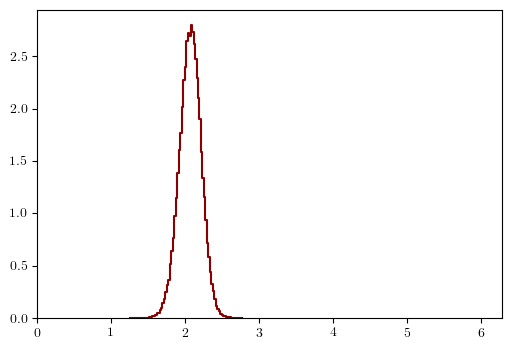

(0.0, 6.283185307179586)

In [13]:
fig, ax= plt.subplots(1,1, figsize=(6,4))

ax.step(midpoints(hist_v.edges[1]), hist_v.weights, color="darkred")
ax.set_ylim(bottom=0.0)
ax.set_xlim(0, 2*pi)